This example shows how to use deletion and insertion evaluations. We show two interpreters SmoothGrad and LIME, with their evaluations.

# SG and Evaluation

We first get the explanation from `SmoothGradInterpreter`.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 20.79it/s]


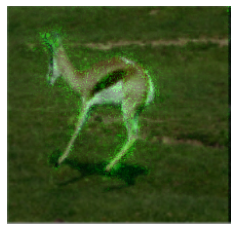

In [5]:
import interpretdl as it
from paddle.vision.models import resnet50
import paddle
!ln -s ../tutorials/assets assets
device = 'gpu:2'
paddle.set_device(device)
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
sg = it.SmoothGradInterpreter(paddle_model, device=device)
exp = sg.interpret(
        img_path, 
        noise_amount=0.1,
        visual=True, 
        labels=None, 
        save_path=None)

Then, give the explantion to the evaluator `DeletionInsertion`.

In [25]:
evaluator = it.DeletionInsertion(paddle_model, device=device)
r = evaluator.evaluate(img_path, exp)
print(r['deletion_score'], r['insertion_score'])

0.05207957 0.6920058


## Plots
We can plot the intermediate results of deletion and insertion.

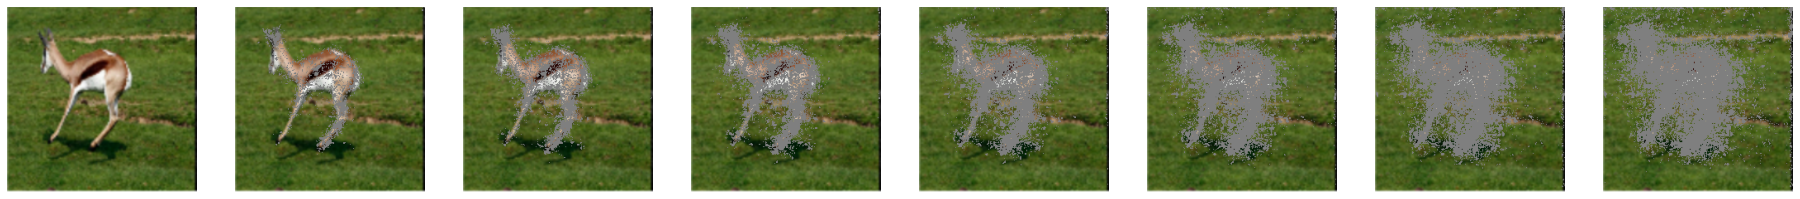

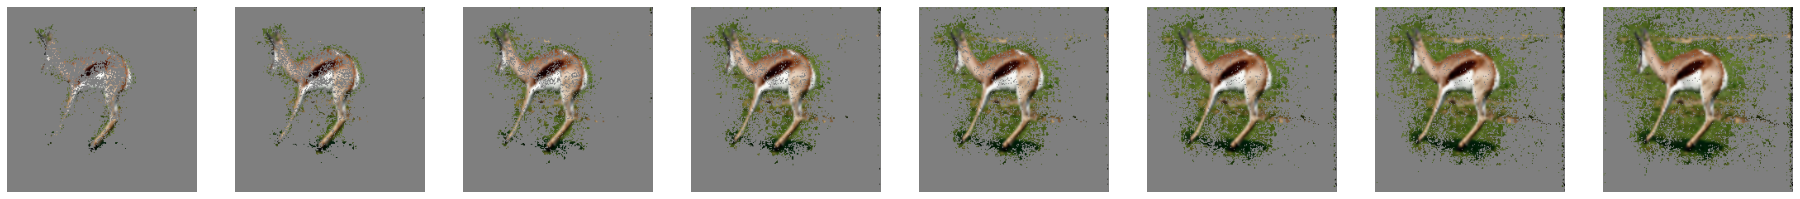

In [26]:
import matplotlib.pyplot as plt

psize = 4
show_images = 8
cols = show_images

# deletion
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['deletion_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

# insertion
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['insertion_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

Text(0.5, 1.0, 'Insertion Curve')

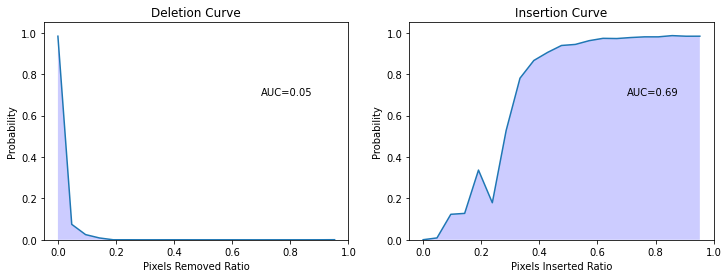

In [31]:
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(np.arange(len(r['del_probas'])) / len(r['del_probas']), r['del_probas'])
axes[0].text(0.7, 0.7, f"AUC={np.mean(r['del_probas']):.2f}")
axes[0].fill_between(x = np.arange(len(r['del_probas'])) / len(r['del_probas']),
                 y1 = 0,
                 y2 = r['del_probas'],
                 alpha = 0.2,
                 facecolor = 'blue')
axes[0].set_ylim((0, 1.05))
axes[0].set_xlabel('Pixels Removed Ratio')
axes[0].set_ylabel('Probability')
axes[0].set_title('Deletion Curve')

axes[1].plot(np.arange(len(r['ins_probas'])) / len(r['ins_probas']), r['ins_probas'])
axes[1].text(0.7, 0.7, f"AUC={np.mean(r['ins_probas']):.2f}")
axes[1].fill_between(x = np.arange(len(r['ins_probas'])) / len(r['ins_probas']),
                 y1 = 0,
                 y2 = r['ins_probas'],
                 alpha = 0.2,
                 facecolor = 'blue')
axes[1].set_ylim((0, 1.05))
axes[1].set_xlabel('Pixels Inserted Ratio')
axes[1].set_ylabel('Probability')
axes[1].set_title('Insertion Curve')

# LIME and Evaluation

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:24<00:00, 123.61it/s]


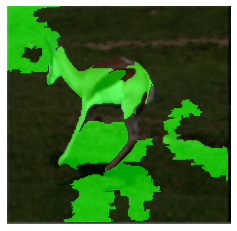

In [13]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
lime = it.LIMECVInterpreter(paddle_model, device=device)
lime_weights = lime.interpret(
    img_path,
    num_samples=3000,
    batch_size=50,
    visual=True,
    save_path=None
)

In [33]:
evaluator = it.DeletionInsertion(paddle_model, device=device)
r = evaluator.evaluate(img_path, lime.lime_results, limit_number_generated_samples=20)
print(r['deletion_score'], r['insertion_score'])

0.059958726 0.69169056


## Plots

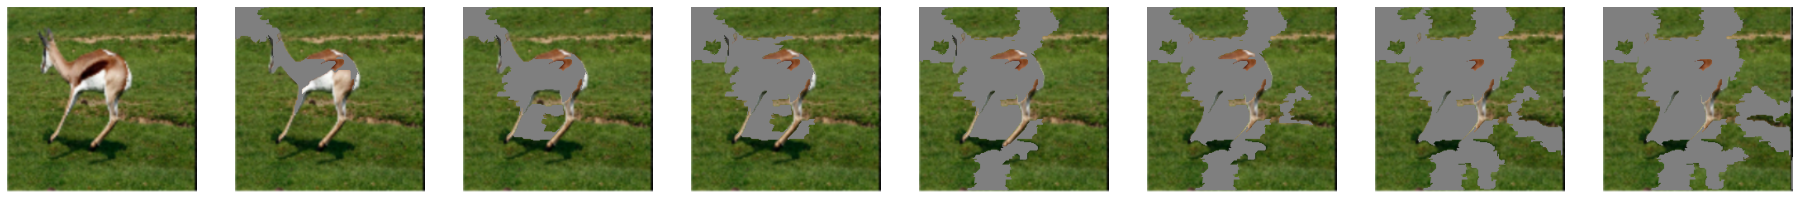

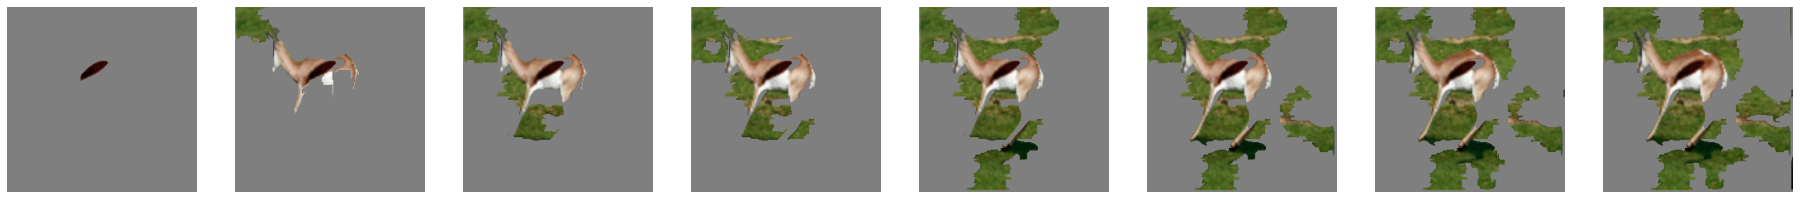

In [34]:
import matplotlib.pyplot as plt

psize = 4
show_images = 8
cols = show_images

# deletion
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['deletion_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

# insertion
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['insertion_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

Text(0.5, 1.0, 'Insertion Curve')

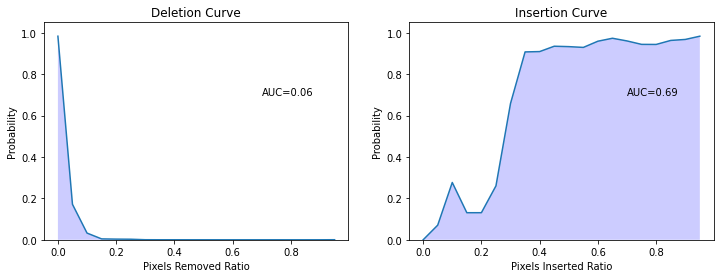

In [35]:
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(np.arange(len(r['del_probas'])) / len(r['del_probas']), r['del_probas'])
axes[0].text(0.7, 0.7, f"AUC={np.mean(r['del_probas']):.2f}")
axes[0].fill_between(x = np.arange(len(r['del_probas'])) / len(r['del_probas']),
                 y1 = 0,
                 y2 = r['del_probas'],
                 alpha = 0.2,
                 facecolor = 'blue')
axes[0].set_ylim((0, 1.05))
axes[0].set_xlabel('Pixels Removed Ratio')
axes[0].set_ylabel('Probability')
axes[0].set_title('Deletion Curve')

axes[1].plot(np.arange(len(r['ins_probas'])) / len(r['ins_probas']), r['ins_probas'])
axes[1].text(0.7, 0.7, f"AUC={np.mean(r['ins_probas']):.2f}")
axes[1].fill_between(x = np.arange(len(r['ins_probas'])) / len(r['ins_probas']),
                 y1 = 0,
                 y2 = r['ins_probas'],
                 alpha = 0.2,
                 facecolor = 'blue')
axes[1].set_ylim((0, 1.05))
axes[1].set_xlabel('Pixels Inserted Ratio')
axes[1].set_ylabel('Probability')
axes[1].set_title('Insertion Curve')